# <center> Data cleaning project "Used cars"

<center> Data was taken from https://codefinity.com/

#### In this small project, I will normalize, clean and prepare the data for further analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('first_df', index_col=0)

df.sample(5)

,Make,Engine Capacity(CC),Mileage(kms),Year,Price
14985,Toyota,"4600,0",152861.0,2011,"12500000,0"
6319,Toyota,"2700,0",600.0,2021,"8550000,0"
32247,Toyota,"1300,0",3200.0,2021,"2840000,0"
55341,Honda,"1300,0",47000.0,2018,"2530000,0"
37596,Honda,"1300,0",92000.0,Two thousand and sixteen,"2850000,0"


In [2]:
df.head(5)

,Make,Engine Capacity(CC),Mileage(kms),Year,Price
0,Honda,"1500,0",41371.0,2017,"3150000,0"
1,Toyota,"1600,0",2460.0,2021,"3575000,0"
2,Toyota,"1000,0",67000.0,2014,"1955000,0"
3,Daihatsu,"660,0",64000.0,Two thousand and thirteen,"1450000,0"
4,Toyota,"2700,0",64000.0,Two thousand and sixteen,"19000000,0"


In [3]:
df.tail(5)

,Make,Engine Capacity(CC),Mileage(kms),Year,Price
76733,NaN,NaN,NaN,NaN,NaN
76734,NaN,NaN,NaN,NaN,NaN
76735,NaN,NaN,NaN,NaN,NaN
76736,NaN,NaN,NaN,NaN,NaN
76737,NaN,NaN,NaN,NaN,NaN


In [4]:
total = df.isna().sum()

print(total)

Make                   48
Engine Capacity(CC)    51
Mileage(kms)           48
Year                   48
Price                  48
dtype: int64


In [5]:
# Delete NaN values
df.dropna(inplace = True)

df.sample(1)

,Make,Engine Capacity(CC),Mileage(kms),Year,Price
46072,Suzuki,"660,0",122000.0,2015,"1900000,0"


In [6]:
df.dtypes

Make                    object
Engine Capacity(CC)     object
Mileage(kms)           float64
Year                    object
Price                   object
dtype: object

So several dates in the Year column were written by words, not by numbers, I have to fix it.

- Let's create an empty list list_df for storing dates that were written incorrectly.
- Then create the for loop that goes through each element in the column name, that was put as an argument to the function.
- Will check if the length of the element is greater than 4 (because regular date consists of 4 digits, but date written using words include more characters).
- If the previous condition returns True, append an element i to the created list_df.
- Delete duplicates.
- Return obtained list.

In [7]:
def func(df, name):
    list_df = []
   
    for i in df[name]:
        if len(i) > 4:
            list_df.append(i)
    result = set(list_df)

    return result

func(df, 'Year')

{'Two thousand and sixteen', 'Two thousand and thirteen'}

In [8]:
df.Year.value_counts()

2018                        6893
2021                        6868
2017                        5795
Two thousand and sixteen    5310
2015                        4479
                            ... 
1959                           1
1964                           1
1940                           1
1962                           1
1950                           1
Name: Year, Length: 68, dtype: int64

In [9]:
# Replace incorrect dates
df['Year'].replace({'Two thousand and sixteen': 2016,'Two thousand and thirteen': 2013}, inplace = True)

df['Year'] = df['Year'].astype(int)

print(df['Year'].max())

2021


In [10]:
def separator(data, column_name):
    data[column_name] = data[column_name].str.replace(',', '.')
    data[column_name] = data[column_name].astype(float)

# Apply function to the required columns
separator(df, 'Price')
separator(df , 'Engine Capacity(CC)')

df['Engine Capacity(CC)'].head(5), df['Price'].head(5)

(0    1500.0
 1    1600.0
 2    1000.0
 3     660.0
 4    2700.0
 Name: Engine Capacity(CC), dtype: float64,
 0     3150000.0
 1     3575000.0
 2     1955000.0
 3     1450000.0
 4    19000000.0
 Name: Price, dtype: float64)

I remember about outliers and about how harmful they can be.

Let's use describe() function to detect if there are some outliers .

In [11]:
df.describe()

,Engine Capacity(CC),Mileage(kms),Year,Price
count,76687.000000,76687.000000,76687.000000,7.668700e+04
mean,1499.699806,87962.008854,2011.999100,3.023153e+06
std,723.373657,78759.333327,7.371107,4.303289e+06
min,16.000000,1.000000,1940.000000,5.000000e+05
25%,1000.000000,39000.000000,2007.000000,1.215000e+06
50%,1300.000000,79900.000000,2014.000000,2.025000e+06
75%,1800.000000,119800.000000,2018.000000,3.200000e+06
max,6603.000000,999999.000000,2021.000000,9.350000e+07


Mean 2011.9991002386323
Median 2014.0


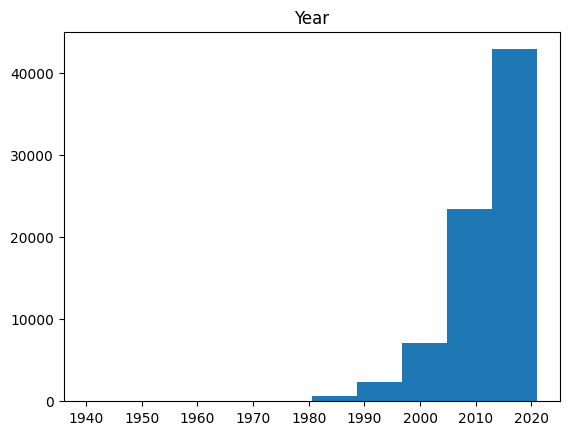

In [12]:
print("Mean", df['Year'].mean())
print("Median", df['Year'].median())

fig, ax = plt.subplots()

ax.hist(df["Year"])

plt.title('Year')

plt.show()

### We see a left-skewed distribution.

It's time to delete outliers.

Two ways how to do it:

- Removing outliers using mean and std.
- Removing outliers using IQR.

In [13]:
df.shape

(76687, 5)

In [14]:
df.isna().sum()

Make                   0
Engine Capacity(CC)    0
Mileage(kms)           0
Year                   0
Price                  0
dtype: int64

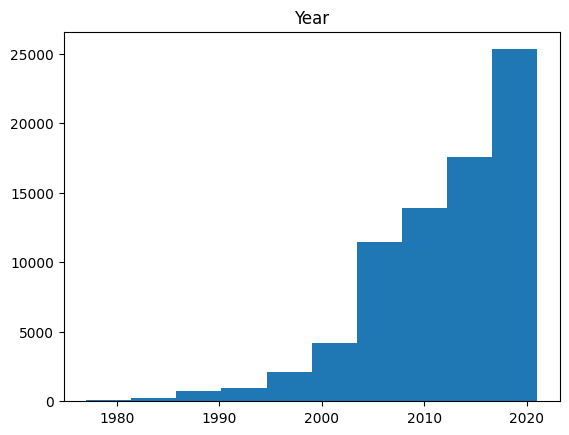

In [15]:
# Delete 10% from the left tail and 1% from the right one
q10, q50, q99 = df['Year'].quantile(q = [0.1, 0.5, 0.99])

# Subtract the q10 from the q99
iqr = q99-q10

# let's create a new dataset without outliers
df_without_outliers = df.copy()

df_without_outliers['Year'] = df_without_outliers['Year'].loc[(df_without_outliers['Year'] > q10 - 1.5*iqr) & (df_without_outliers['Year'] < q99 + 1.5*iqr)]

fig, ax = plt.subplots()

ax.hist(df_without_outliers['Year'])

plt.title('Year')

plt.show()

In [16]:
df.shape

(76687, 5)

In [17]:
mean_1 = df['Year'].mean()

mean_2 = df_without_outliers['Year'].mean()

# Find the difference between mean values
mean_difference=((mean_2 - mean_1)/mean_1) * 100

median_1 = df['Year'].median()

median_2 = df_without_outliers['Year'].median()

# Find the difference between median values
median_difference = ((median_1 - median_2)/median_2) * 100

print("How much did the mean value change after removing outliers:")
print(mean_difference)
print("How much did the median value change after removing outliers:")
print(median_difference)

How much did the mean value change after removing outliers:
0.0028774251527552597
How much did the median value change after removing outliers:
0.0


In [18]:
df.head()

,Make,Engine Capacity(CC),Mileage(kms),Year,Price
0,Honda,1500.0,41371.0,2017,3150000.0
1,Toyota,1600.0,2460.0,2021,3575000.0
2,Toyota,1000.0,67000.0,2014,1955000.0
3,Daihatsu,660.0,64000.0,2013,1450000.0
4,Toyota,2700.0,64000.0,2016,19000000.0


In [19]:
# Convert kilometers to miles
df["Mileage(kms)"] = df["Mileage(kms)"]/1.609344  

df.rename(columns = {"Mileage(kms)":'Mileage(miles)'} , inplace = True)

print(df['Mileage(miles)'].sample(5))

39491     55923.407301
26123         0.621371
835       15443.559612
70790    189280.228466
34079     33554.044381
Name: Mileage(miles), dtype: float64
